based on https://github.com/tkrajina/srtm.py

In [1]:
pip install SRTM.py

Note: you may need to restart the kernel to use updated packages.


In [2]:
import srtm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# make matplotlib interactive
%matplotlib widget

In [4]:
geo_elevation_data = srtm.get_data()

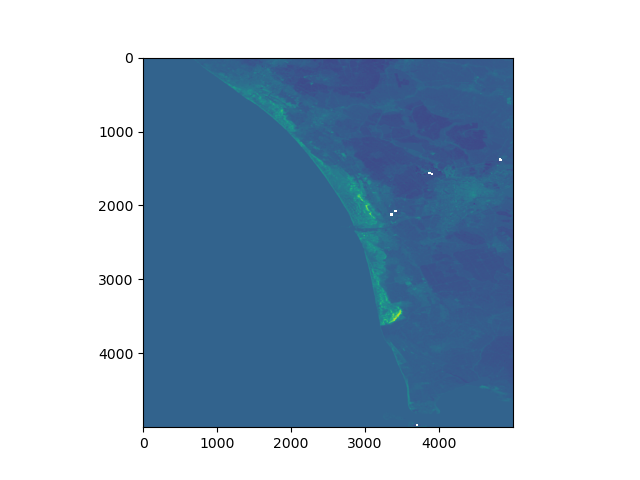

In [5]:
image_size = 5000

# coordinates for delft
latitude_interval = (52,53)
longitude_interval = (4, 5)

# get data as np array
image1 = geo_elevation_data.get_image((image_size, image_size), latitude_interval, longitude_interval, 300, mode='array')

plt.imshow(image1)
plt.show()

In [6]:
#image_size = 500

#bounding box for the AOI_1
#latitude_interval = (38.884619201291905, 39.11727568585598)
#longitude_interval= (-108.24005126953124, -107.9)

# get data as np array
#image2 = geo_elevation_data.get_image((image_size, image_size), latitude_interval, longitude_interval, 300, mode='array')

#plt.imshow(image2)
#plt.show()

In [7]:
# Georeference

In [8]:
import rasterio
from rasterio.transform import from_bounds
from rasterio.crs import CRS

# TEMP FIX (It is late here :D) Somehow the raster is not rotated right when creating (probably something in the transform must be changed)
image1 = np.flip(image1)

epsg_code = 4326

# many different possibilities: https://rasterio.readthedocs.io/en/latest/api/rasterio.transform.html#:~:text=rasterio.transform.array_bounds(height%2C%20width%2C%20transform)
# from_bounds(west, south, east, north, width, height)
transform = rasterio.transform.from_bounds(longitude_interval[0], latitude_interval[0], longitude_interval[1], latitude_interval[1], image1.shape[1], image1.shape[0])

print(transform)

new_dataset = rasterio.open('test.tif', 'w', driver='GTiff',
                            height = image1.shape[0], width = image1.shape[1],
                            count=1, dtype=str(image1.dtype),
                            crs=CRS.from_epsg(epsg_code),
                            transform=transform)

new_dataset.write(image1, 1)
new_dataset.close()


| 0.00, 0.00, 4.00|
| 0.00,-0.00, 53.00|
| 0.00, 0.00, 1.00|


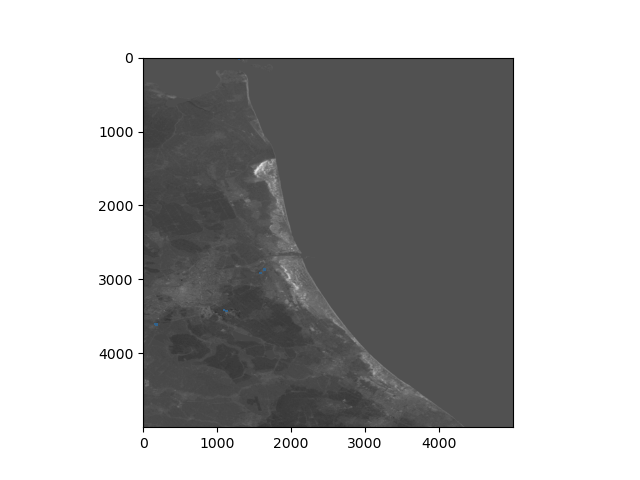

In [9]:
# show tiff image
src = rasterio.open('test.tif')
img = src.read(1)
plt.imshow(img, cmap='gray')
plt.show()

In [10]:
# display
import folium

min_lon, min_lat, max_lon, max_lat = src.bounds

bounds_orig = [[min_lat, min_lon], [max_lat, max_lon]]
bounds_fin = []
 
for item in bounds_orig:   
    #converting to lat/lon
    lat = item[0]
    lon = item[1]
      
    bounds_fin.append([lat, lon])

# Finding the centre latitude & longitude    
centre_lon = bounds_fin[0][1] + (bounds_fin[1][1] - bounds_fin[0][1])/2
centre_lat = bounds_fin[0][0] + (bounds_fin[1][0] - bounds_fin[0][0])/2

m = folium.Map([centre_lat, centre_lon], zoom_start=8, tiles='cartodbpositron')

m.add_child(folium.raster_layers.ImageOverlay(img, opacity=.7, 
                                 bounds = bounds_fin))
m